# Effects of Loan Features  on The Loan Amount

## Investigation Overview

In this investigation, I am interested in finding out the features that can be used to best predict the LoanOriginalAmount feature. The main focus was on the credit score, income range, whether borrower income was verifiable, and whether the borrower was a home owner.

## Dataset Overview
Initially, the dataset consisted of 113,937 loans with 81 features, including loan amount, credit score, income range and many other features. Part of the the dataset was removed because of missing values, duplicated loankeys, incorrect data, and outliers. In the end, the remaining data is 81857 rows and 81 columns.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe, print statistics
loans = pd.read_csv('loans_data.csv')

In [4]:
non_ordinal_var_dict = {'IncomeRange': ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}
for var in non_ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = non_ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

In [5]:
numeric_vars = ['LoanOriginalAmount', 'StatedMonthlyIncome', 'Investors', 'ProsperScore', 'CreditScoreRangeLower']
categoric_vars = ['IncomeRange', 'IncomeVerifiable',  'IsBorrowerHomeowner']

In [6]:
# A function that returns the lower and upper range limits

def get_range_limits(data):
    """ A function that takes in a column as parameter,
    calculates the interquantile range and uses it to find
    the lower and upper limits for the dataset.
    """
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

# Get the lower and upper limits of each feature
loan_amount_limits = get_range_limits(loans.LoanOriginalAmount)
credit_score_limits = get_range_limits(loans.CreditScoreRangeLower)
num_investors_limits = get_range_limits(loans.Investors)
monthly_income_limits = get_range_limits(loans.StatedMonthlyIncome)

In [7]:
loans.LoanOriginalAmount = np.where(loans.LoanOriginalAmount > loan_amount_limits[1], loan_amount_limits[1], 
                                   np.where(loans.LoanOriginalAmount < loan_amount_limits[0], loan_amount_limits[0], loans['LoanOriginalAmount']))

In [8]:
loans.CreditScoreRangeLower = np.where(loans.CreditScoreRangeLower >credit_score_limits[1], credit_score_limits[1], 
                                   np.where(loans.CreditScoreRangeLower < credit_score_limits[0], credit_score_limits[0], loans['CreditScoreRangeLower']))

In [9]:
loans.Investors = np.where(loans.Investors >num_investors_limits[1], num_investors_limits[1], 
                                   np.where(loans.Investors < num_investors_limits[0], num_investors_limits[0], loans['Investors']))

In [10]:
loans.StatedMonthlyIncome = np.where(loans.StatedMonthlyIncome >monthly_income_limits[1], monthly_income_limits[1], 
                                   np.where(loans.StatedMonthlyIncome < monthly_income_limits[0], monthly_income_limits[0], loans['StatedMonthlyIncome']))

## Distribution of  LoanOriginalAmount

The loan amount feature initially had a long tail starting from a minimum of USD 1,000) to a maximum of USD 36,000. After dealing with the outliers the tail shortened to about USD 27,000. Plotted on a logarithmic scale, the distribution has a multi-modal shape.

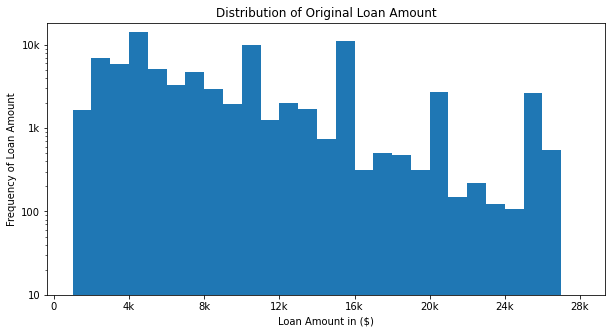

In [11]:
default_color = sns.color_palette()[0]

plt.figure(figsize=[10,5])
bins_l = np.arange(1000, loans['LoanOriginalAmount'].max()+ 2000, 1000)
plt.hist(data=loans, x='LoanOriginalAmount', bins=bins_l)
plt.xlabel('Loan Amount in ($)')
ticks_l = [0, 4e3, 8e3, 12e3, 16e3, 20e3, 24e3, 28e3]
labels_l = [0, '4k', '8k', '12k', '16k', '20k', '24k', '28k']
plt.yscale('log')
plt.title('Distribution of Original Loan Amount')
plt.xlim=(loans.LoanOriginalAmount.min(), loans.LoanOriginalAmount.max())
plt.yticks([10, 100, 1e3, 10e3],[10, 100, '1k', '10k'])
plt.ylabel('Frequency of Loan Amount')
plt.xticks(ticks_l, labels_l)

plt.show();

## Distribution of CreditScoreRangeLower
The credit score feature initially had a short tail starting from a minimum of 600 to a maximum of 850. After dealing with the outliers the tail shortened to about 810. This score comes from an external credit agency to show the credibility of the borrower in terms of paying their loans.

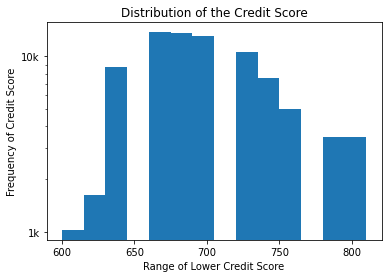

In [12]:
bins_c =  np.arange(loans.CreditScoreRangeLower.min(), loans['CreditScoreRangeLower'].max() + 10, 15)

plt.hist(data=loans, x='CreditScoreRangeLower', color=default_color, bins=bins_c)
ticks_r = np.arange(0, loans.CreditScoreRangeLower.max() + 10, 15)
label_r = np.arange(0, loans.CreditScoreRangeLower.max() + 10, 15)
plt.xlabel('Range of Lower Credit Score')
plt.yscale('log')
plt.title('Distribution of the Credit Score')
plt.xlim=(loans.CreditScoreRangeLower.min(), loans.CreditScoreRangeLower.max())
plt.yticks([1e3, 10e3],['1k', '10k'])
plt.ylabel('Frequency of Credit Score')
plt.show();

## Correlations Among Features of Interest

Generally, the numerical features of interest did not have strong correlations with the loan amount. The highest correlation was that of the stated monthly income which was still very weak.

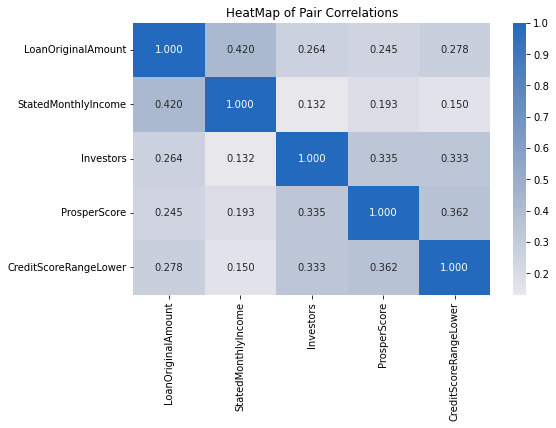

In [13]:
# plot correlation
plt.figure(figsize = [8, 5])
sns.heatmap(loans[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('HeatMap of Pair Correlations')
plt.show();

## Original Loan Amount Against Income Range
The income range is the one that is the highest predictor of the loan amount. The higher the income range, the higher the loan amount. The lowest income range \\$1-24,999) has an average loan amount of \\$4300, \\$25,000-49,000 has an average loan amount of \\$6435, \\$50,000-74,999 has an average of \\$9000, \\$75,000-99,999 has an average of \\$10622, and \\$100+ has an average of \\$12850.

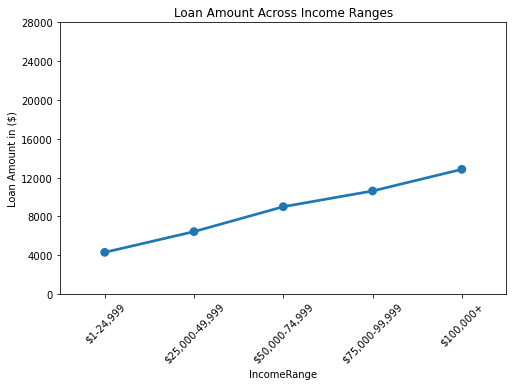

In [14]:
plt.figure(figsize = [8, 5])


sns.pointplot(data=loans, x='IncomeRange', y='LoanOriginalAmount', linestyles='-')
plt.title('Loan Amount Across Income Ranges')
plt.xticks(rotation=45)
plt.yticks(ticks_l)
plt.ylabel('Loan Amount in ($)')
plt.show();

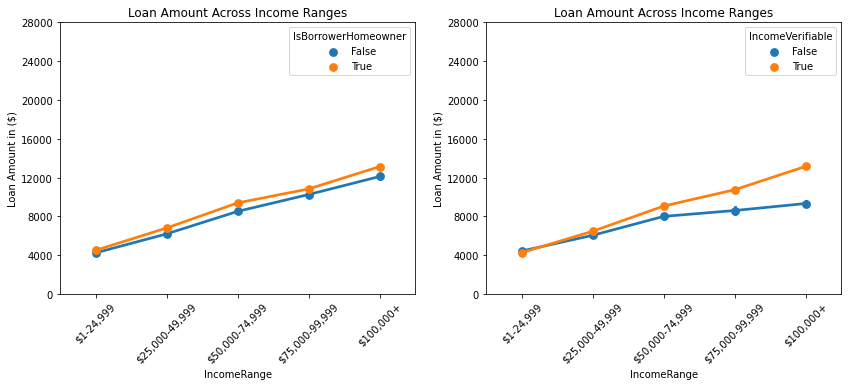

In [15]:

plt.figure(figsize = [14, 5])

plt.subplot(1, 2, 1)
sns.pointplot(data=loans, x='IncomeRange', y='LoanOriginalAmount', hue='IsBorrowerHomeowner', linestyles='-')
plt.title('Loan Amount Across Income Ranges')
plt.xticks(rotation=45)
plt.yticks(ticks_l)
plt.ylabel('Loan Amount in ($)')

plt.subplot(1, 2, 2)
sns.pointplot(data=loans, x='IncomeRange', y='LoanOriginalAmount', hue='IncomeVerifiable', linestyles='-')
plt.title('Loan Amount Across Income Ranges')
plt.xticks(rotation=45)
# plt.yscale('log')
plt.yticks(ticks_l)
plt.ylabel('Loan Amount in ($)')

plt.show();